# This Notebook produces the regresion lines for different sensors

Author: Jax

Date: 06-09-2023

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,10)})
import scipy.stats
num = 9 # number of sensors to check

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

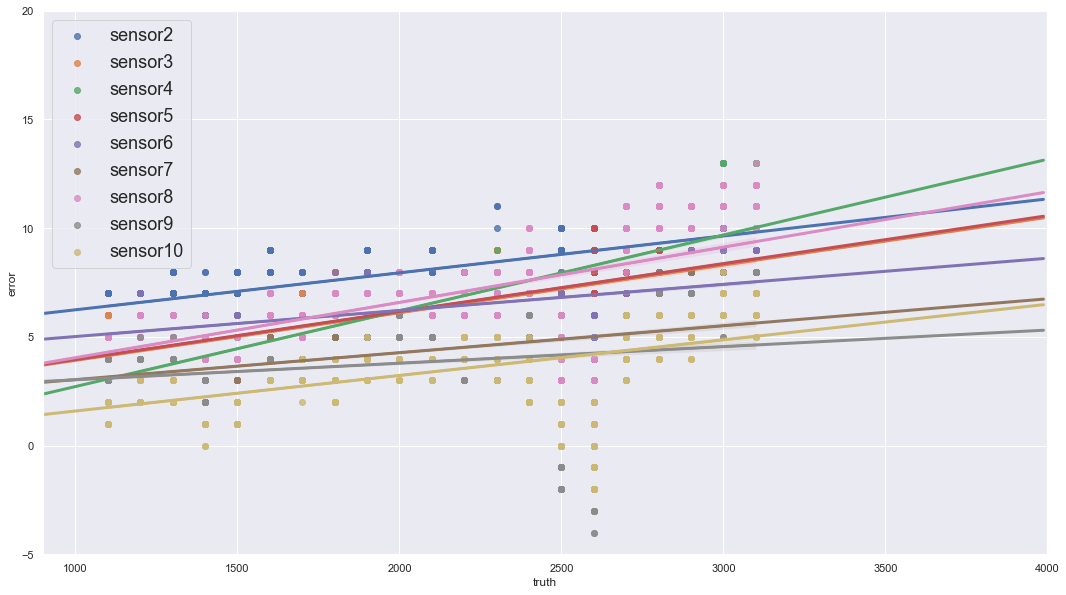

In [64]:
use = pd.DataFrame()
fig, ax = plt.subplots(figsize=(18,10))
lis = []
for i in range(9):
    sub = pd.read_csv(f'//Users/lixingji/Desktop/NYU/Summer23/0609_corss_sensors/sensor_{i+2}.csv')
    lis.append(sub)
    #ax.set(xlim=[1000, 4000])
    sns.regplot(sub['truth'],sub['error'], scatter=True, label = 'sensor' + str(i + 2), ax=ax, color = sns.color_palette()[i])
    plt.legend(fontsize=18)
    # extend the canvas
    ax.set_xlim([900,4000])
    ax.set_ylim([-5,20])

    # calculate linear regression function
    slope, intercept, r_value, p_value, std_err = \
    scipy.stats.linregress(x=sub['truth'],y=sub['error'])

    # plot the regression line on the extended canvas
    xlims = ax.get_xlim()
    new_x = np.arange(900, 4000,(xlims[1]-xlims[0])/250)
    ax.plot(new_x, intercept + slope *  new_x, lw = 3, color = sns.color_palette()[i])

    plt.savefig(f'scatterplot_sensor_2_to_{i + 2}')
df = pd.concat(lis)

In [60]:
df.head()

,Unnamed: 0,truth,error,sensor
0,0,1100,6,2
1,1,1100,6,2
2,2,1100,6,2
3,3,1100,6,2
4,4,1100,6,2


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


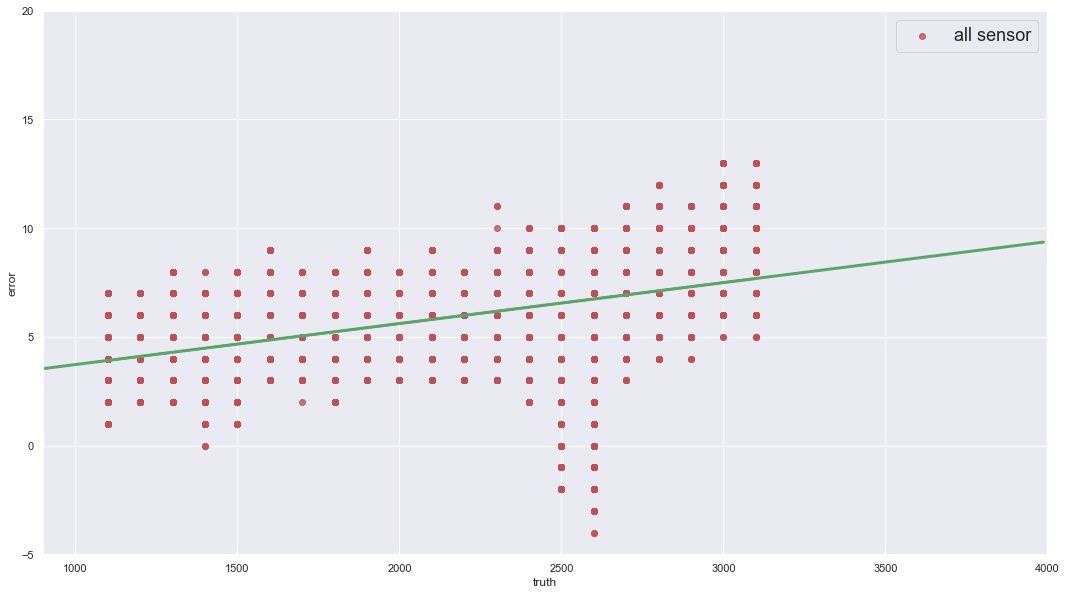

In [65]:
ax2 = sns.regplot(df['truth'],df['error'], scatter=True, label = 'all sensor', color = 'r')
plt.legend(fontsize=18)
ax2.set_xlim([900,4000])
ax2.set_ylim([-5,20])

# calculate linear regression function
slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(x=df['truth'],y=df['error'])

# plot the regression line on the extended canvas
xlims = ax2.get_xlim()
new_x = np.arange(900, 4000,(xlims[1]-xlims[0])/250)
ax2.plot(new_x, intercept + slope *  new_x, lw = 3, color = 'g')

plt.savefig('all_sensor_one_reg')